# Анализ таблиц "credit_card_balance"

Посмотрим, что мы знаем о таблице bureau. Из соревнования:

`
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
`


### Посмотрим на таблицу.

In [1]:
import pandas as pd
import numpy as np
import helpers

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
CREDIT_CARD_BALANCE = pd.read_csv('data/credit_card_balance.csv')
CREDIT_CARD_BALANCE.sample(7, random_state=57)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3645613,2382999,339224,-81,0.000,67500,0.0,0.00,0.0,0.00,0.00,121.590,0.0,0.000,0.000,0.000,0.0,0,0.0,0.0,8.0,Active,0,0
804335,2028497,410255,-56,0.000,135000,0.0,0.00,0.0,0.00,67.50,462.105,0.0,0.000,0.000,0.000,0.0,0,0.0,0.0,40.0,Active,0,0
2050763,1857029,110300,-7,0.000,90000,0.0,0.00,0.0,0.00,0.00,2103.210,0.0,0.000,0.000,0.000,0.0,0,0.0,0.0,52.0,Active,0,0
795977,1762024,343536,-13,67843.080,202500,0.0,73667.43,0.0,73667.43,2250.00,40500.000,40500.0,67843.080,67843.080,67843.080,0.0,42,0.0,42.0,14.0,Active,0,0
1772874,1613407,301481,-17,0.000,0,NaN,0.00,NaN,NaN,0.00,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3501257,2567700,432889,-5,471259.395,450000,0.0,0.00,0.0,0.00,23230.08,0.000,0.0,449751.195,471259.395,471259.395,0.0,0,0.0,0.0,32.0,Active,0,0
943568,1201047,254512,-3,0.000,45000,NaN,0.00,NaN,NaN,0.00,5400.000,5400.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [4]:
helpers.get_df_general_stats(CREDIT_CARD_BALANCE)

,CountNaN,RateNaN%,CountUnique,MinValue,MaxValue,Mean,Std,Median
SK_ID_PREV,0,0,104307,1000018.000,2843496.000,1.904504e+06,536469.470563,1897122.0
SK_ID_CURR,0,0,103558,100006.000,456250.000,2.783242e+05,102704.475133,278396.0
MONTHS_BALANCE,0,0,96,-96.000,-1.000,-3.452192e+01,26.667751,-28.0
AMT_BALANCE,0,0,1347904,-420250.185,1505902.185,5.830016e+04,106307.031025,0.0
AMT_CREDIT_LIMIT_ACTUAL,0,0,181,0.000,1350000.000,1.538080e+05,165145.699523,112500.0
AMT_DRAWINGS_ATM_CURRENT,749816,19,2267,-6827.310,2115000.000,5.961325e+03,28225.688579,0.0
AMT_DRAWINGS_CURRENT,0,0,187005,-6211.620,2287098.315,7.433388e+03,33846.077334,0.0
AMT_DRAWINGS_OTHER_CURRENT,749816,19,1832,0.000,1529847.000,2.881696e+02,8201.989345,0.0
AMT_DRAWINGS_POS_CURRENT,749816,19,168748,0.000,2239274.160,2.968805e+03,20796.887047,0.0
AMT_INST_MIN_REGULARITY,305236,7,312266,0.000,202882.005,3.540204e+03,5600.154122,0.0


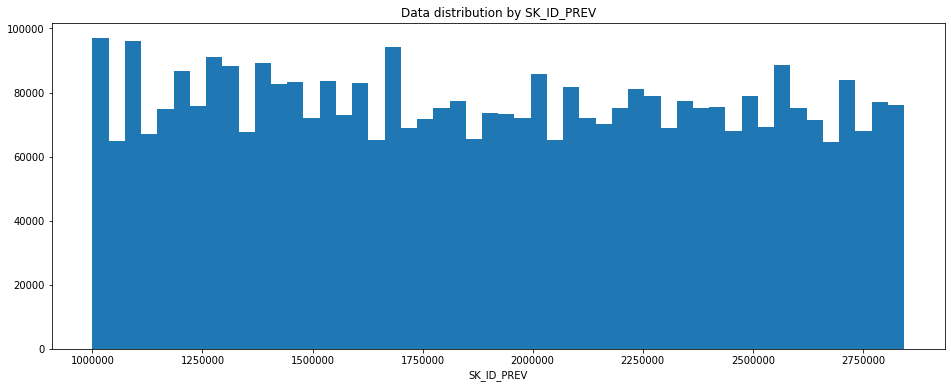

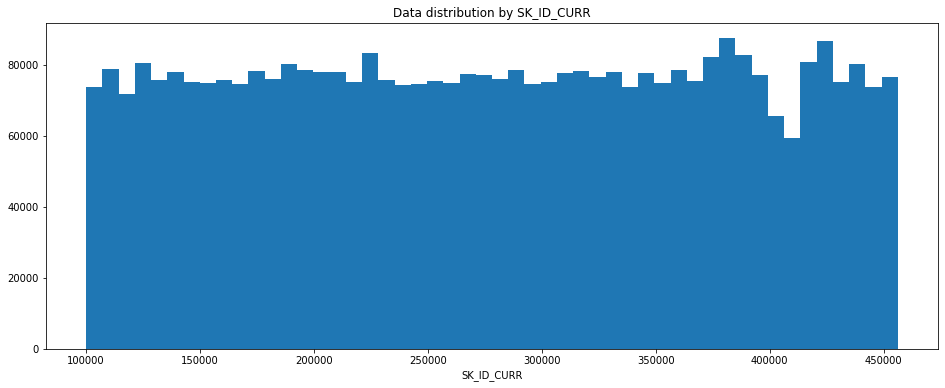

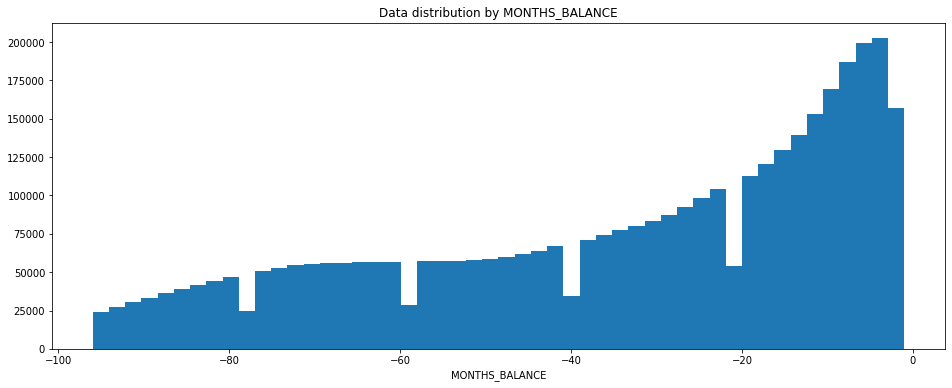

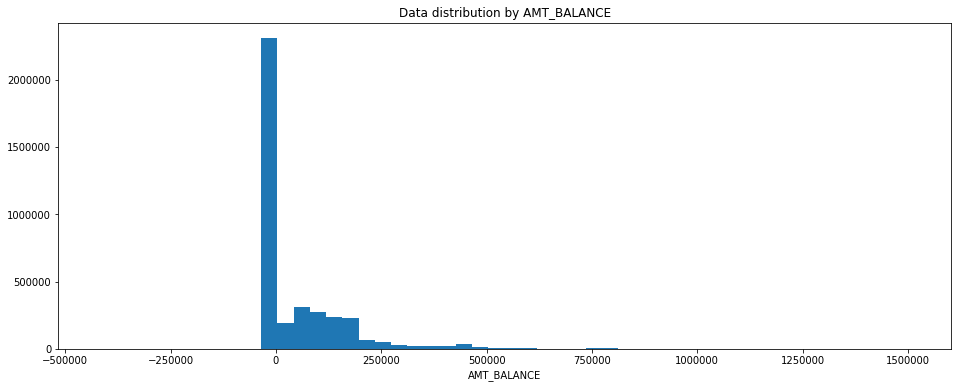

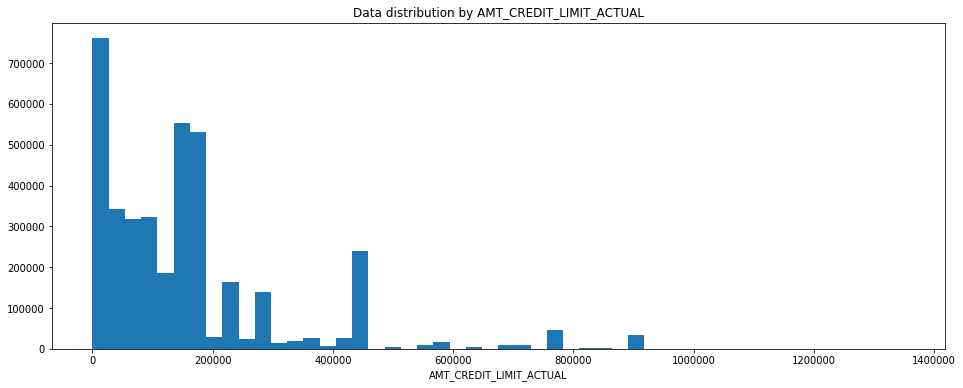

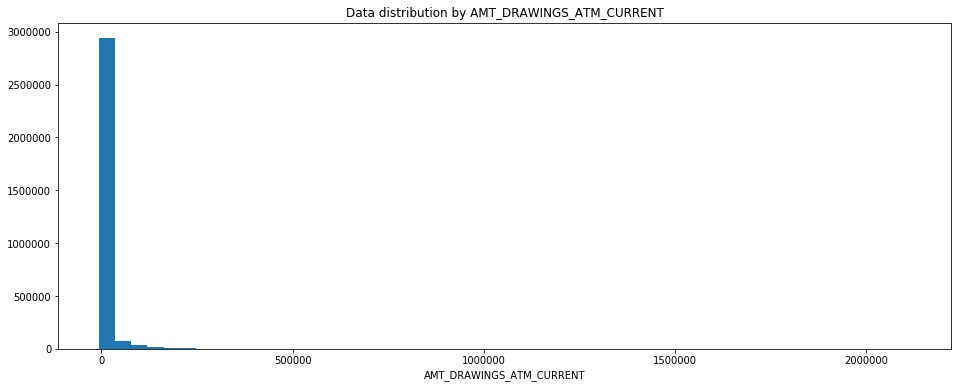

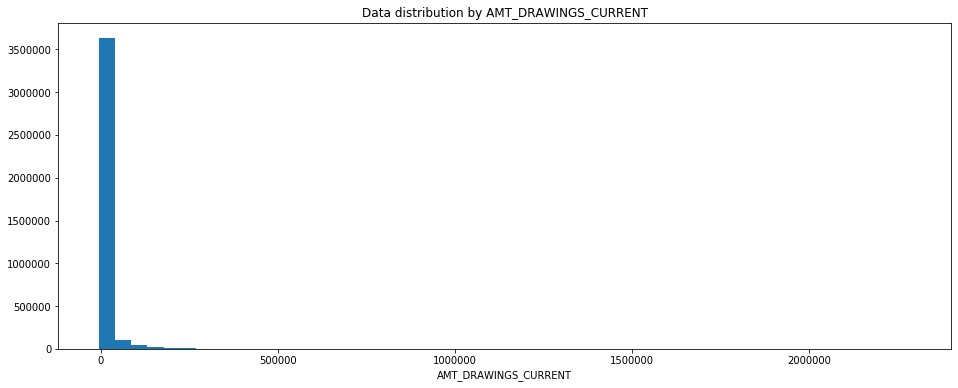

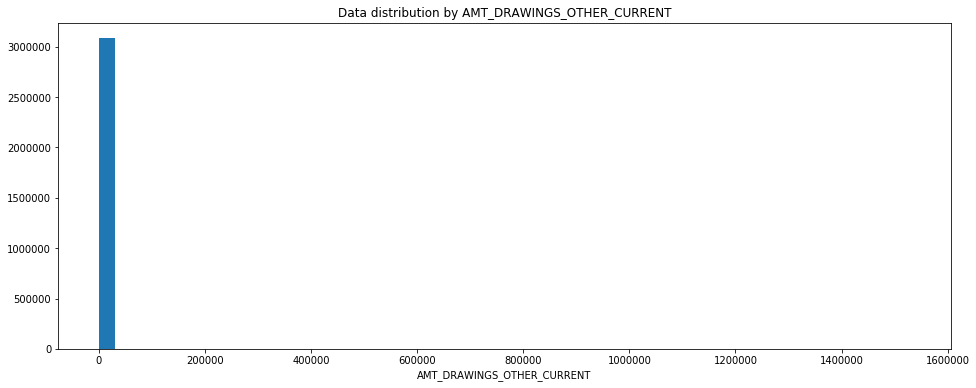

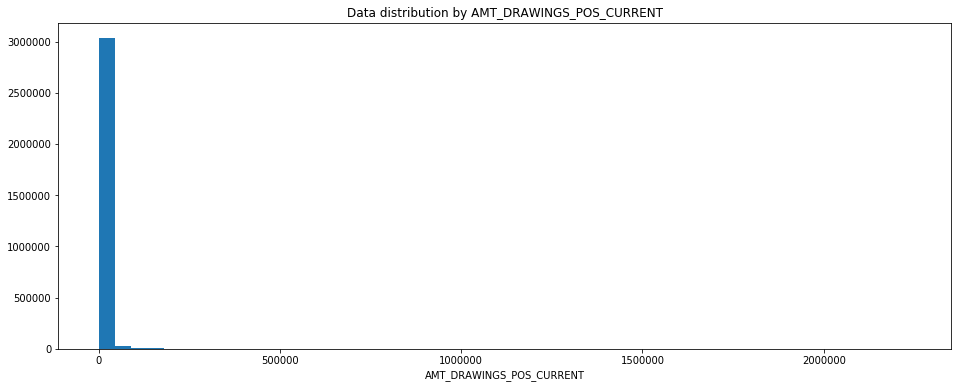

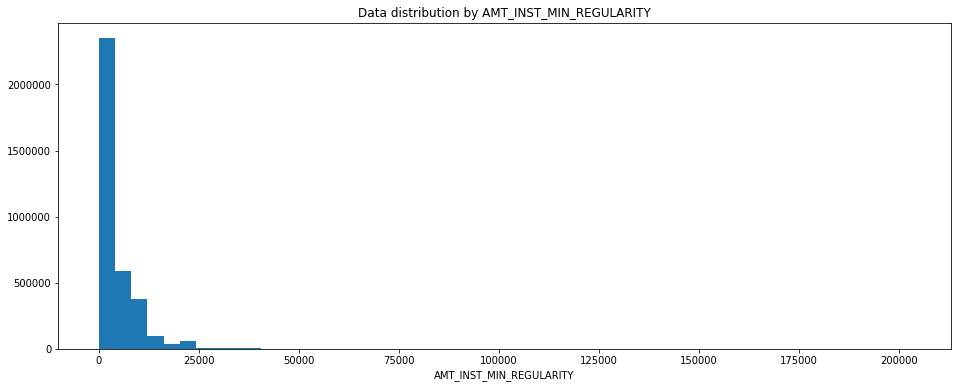

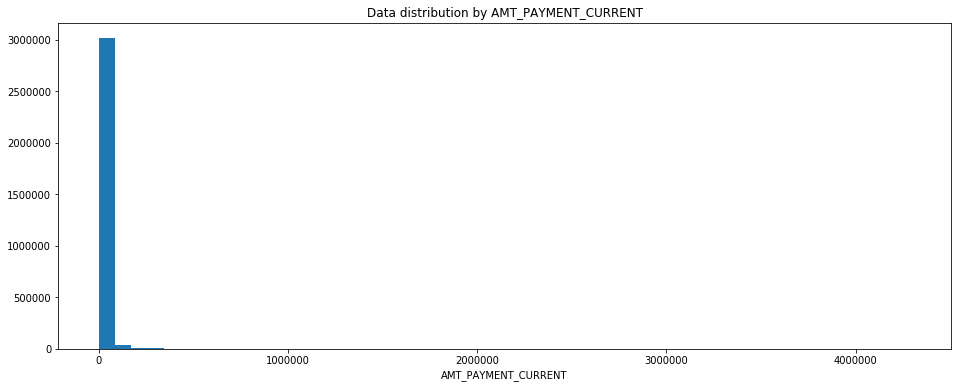

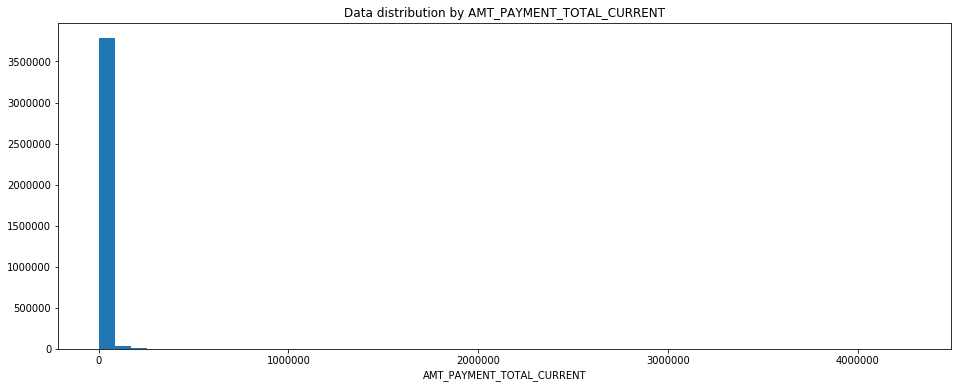

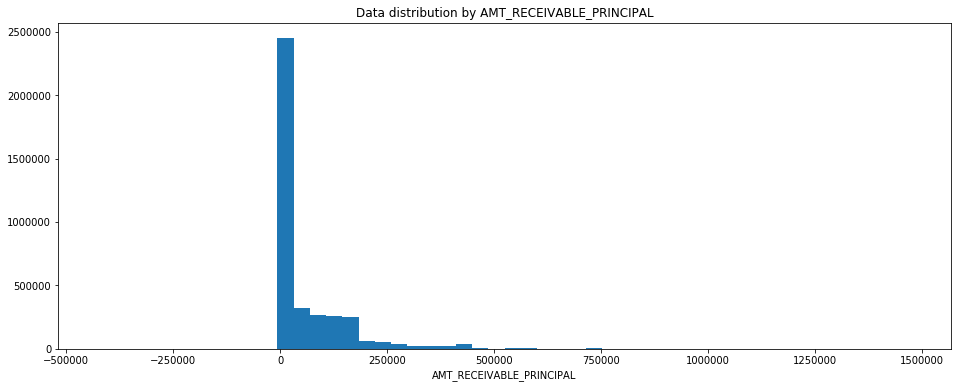

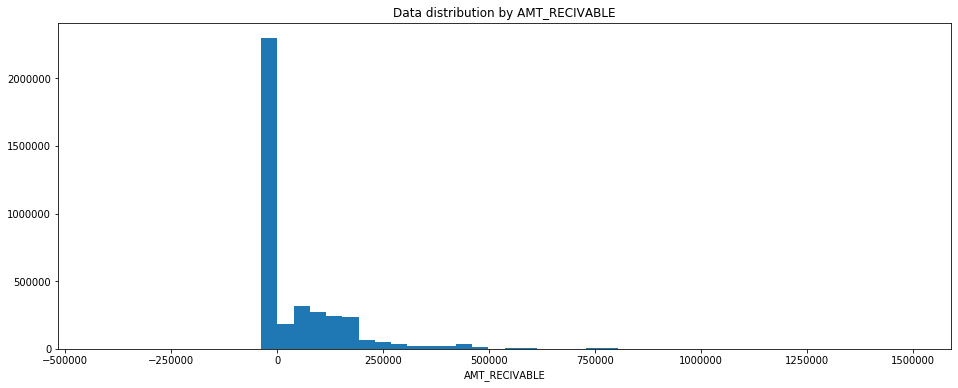

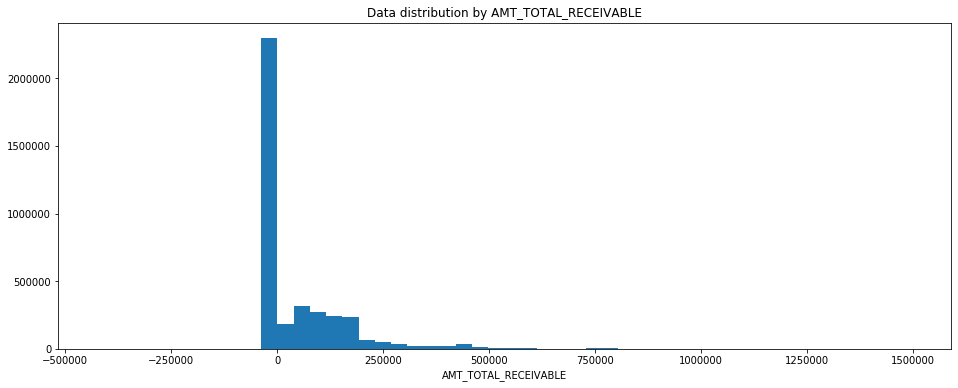

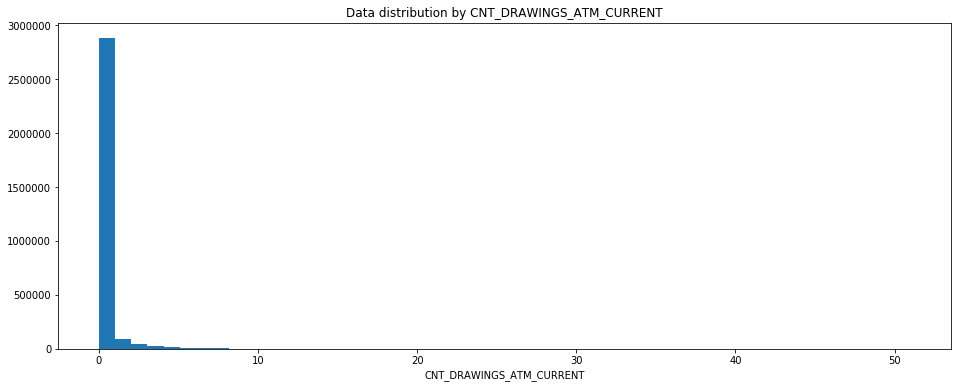

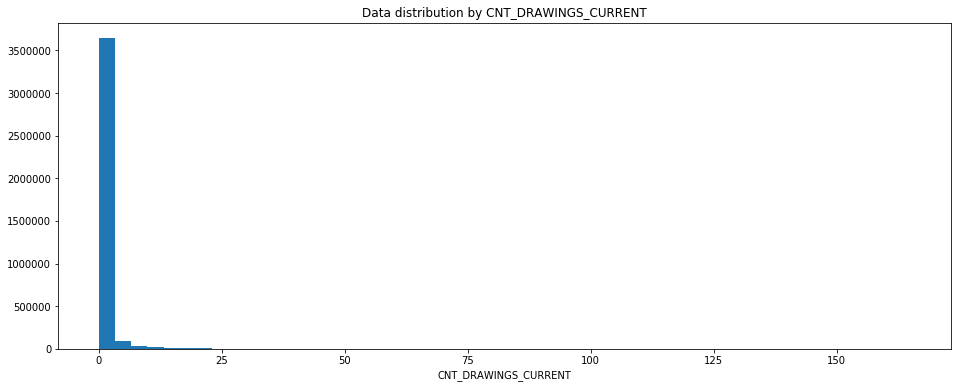

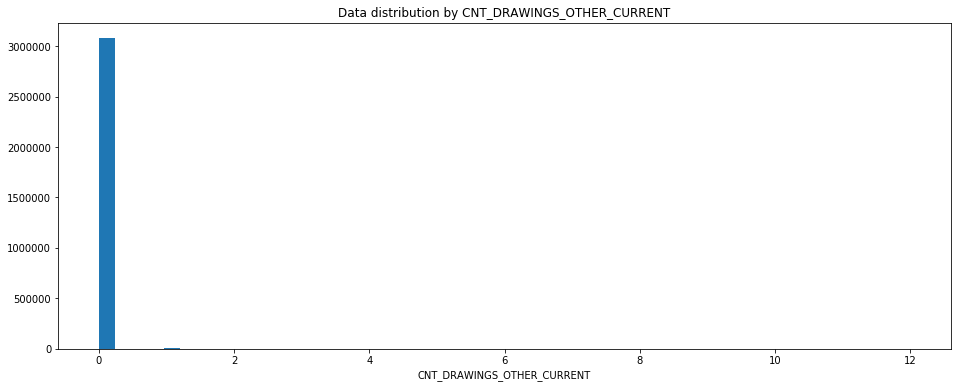

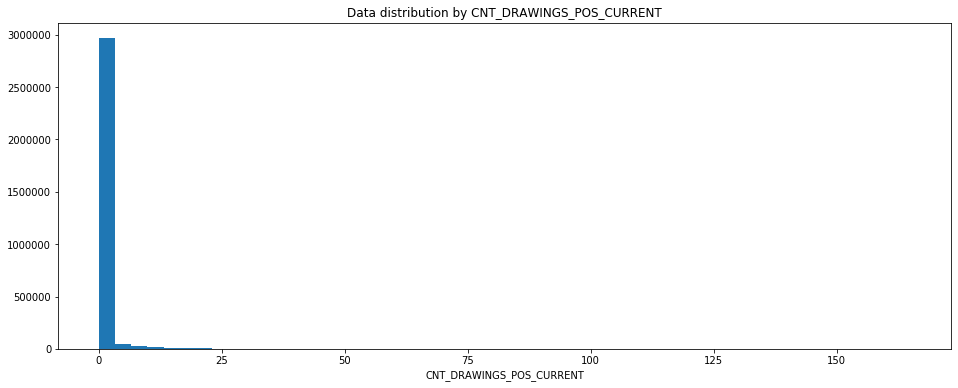

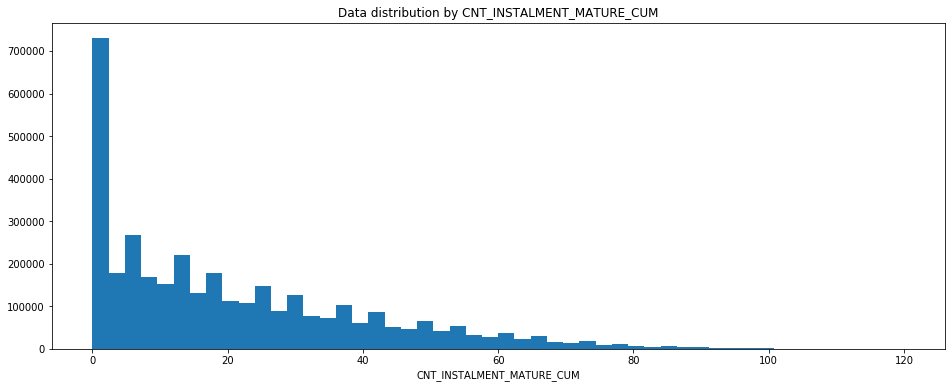

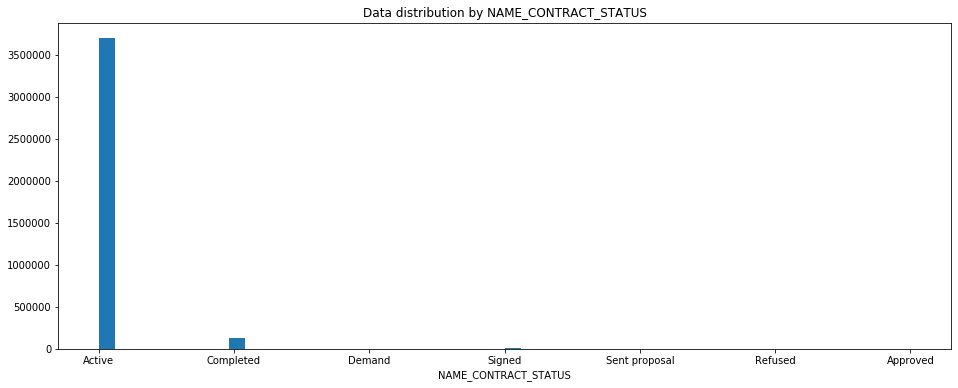

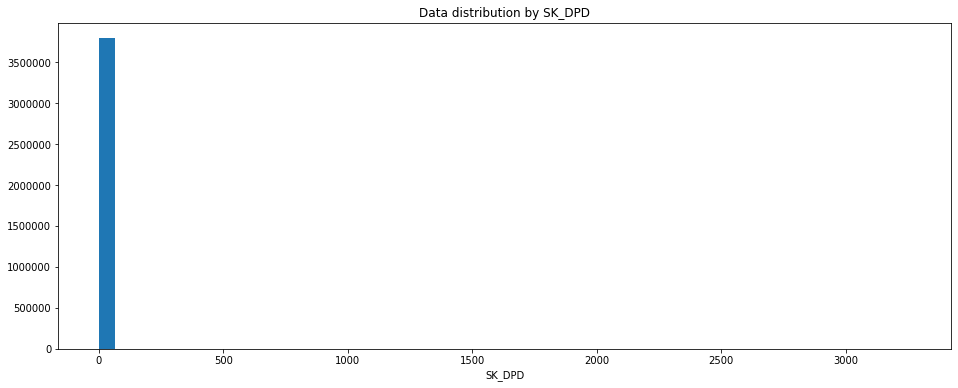

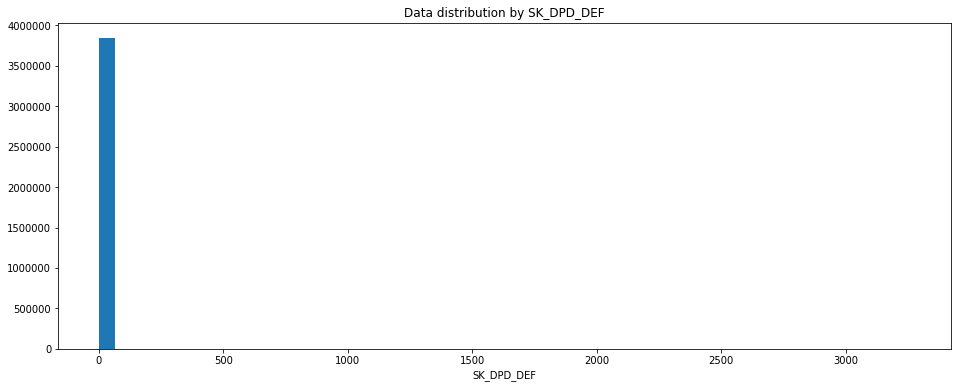

In [6]:
helpers.draw_hists_for_numerical_columns(
    CREDIT_CARD_BALANCE.columns, 
    CREDIT_CARD_BALANCE)

In [7]:
application = pd.read_csv('data/application_train.csv')

In [8]:
application = application[['SK_ID_CURR', 'TARGET']]

In [10]:
application.sample(5, random_state=1)

,SK_ID_CURR,TARGET
64282,174545,1
94645,209898,0
306349,454938,0
258314,398930,0
87597,201672,0


In [37]:
ccb = CREDIT_CARD_BALANCE.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(
        columns = {'SK_ID_PREV': 'ccb__previous_credits_count'})

In [38]:
df = application.merge(ccb, on='SK_ID_CURR', how='left')
df['ccb__previous_credits_count'] = df['ccb__previous_credits_count'].fillna(0)

In [39]:
df.sample(5, random_state=1)

,SK_ID_CURR,TARGET,ccb__previous_credits_count
64282,174545,1,0.0
94645,209898,0,0.0
306349,454938,0,0.0
258314,398930,0,0.0
87597,201672,0,92.0


In [40]:
CCB_NUMERIC_FEATURES = [
    'SK_ID_CURR',
    'AMT_CREDIT_LIMIT_ACTUAL',
    'AMT_DRAWINGS_ATM_CURRENT',
    'AMT_DRAWINGS_CURRENT',
    'AMT_DRAWINGS_OTHER_CURRENT',
    'AMT_DRAWINGS_POS_CURRENT',
    'AMT_INST_MIN_REGULARITY',
    'AMT_PAYMENT_CURRENT',
    'AMT_PAYMENT_TOTAL_CURRENT',
    'AMT_RECEIVABLE_PRINCIPAL',
    'AMT_RECIVABLE',
    'AMT_TOTAL_RECEIVABLE',
    'CNT_DRAWINGS_ATM_CURRENT',
    'CNT_DRAWINGS_CURRENT',
    'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT',
    'CNT_INSTALMENT_MATURE_CUM',
    'SK_DPD',
    'SK_DPD_DEF',
]

In [41]:
ccb_numerical_stats = CREDIT_CARD_BALANCE[CCB_NUMERIC_FEATURES].\
        groupby('SK_ID_CURR', as_index = False).\
        agg(['median', 'mean', 'max', 'min', 'sum']).reset_index()
ccb_numerical_stats.sample(5, random_state=1)

SK_ID_CURR AMT_CREDIT_LIMIT_ACTUAL                                 \
                                  median           mean     max     min   
22993     179483                  157500  218863.636364  292500  157500   
41626     243258                  225000  225000.000000  225000  225000   
6735      123419                  180000  180000.000000  180000  180000   
26910     193147                  135000  135000.000000  135000  135000   
52603     281435                       0  121875.000000  292500       0   

                AMT_DRAWINGS_ATM_CURRENT                                       \
            sum                   median       mean       max  min        sum   
22993   2407500                      0.0      0.000       0.0  0.0        0.0   
41626   4500000                      0.0   8527.500   85500.0  0.0   170550.0   
6735   17280000                      0.0  12421.875  180000.0  0.0  1192500.0   
26910   3375000                      0.0      0.000       0.0  0.0        0.0   
52603   2925000                      0.0  10312.500  247500.0  0.0   247500.0   

      AMT_DRAWINGS_CURRENT                                              \
                    median          mean         max  min          sum   
22993            12208.500  23656.107273  156352.185  0.0   260217.180   
41626             7406.325  27428.710500  130004.100  0.0   548574.210   
6735                 0.000  13700.896875  180000.000  0.0  1315286.100   
26910                0.000    179.820000    4495.500  0.0     4495.500   
52603                0.000  11906.818125  285763.635  0.0   285763.635   

      AMT_DRAWINGS_OTHER_CURRENT                     AMT_DRAWINGS_POS_CURRENT  \
                          median mean  max  min  sum                   median   
22993                        0.0  0.0  0.0  0.0  0.0                12208.500   
41626                        0.0  0.0  0.0  0.0  0.0                 7275.825   
6735                         0.0  0.0  0.0  0.0  0.0                    0.000   
26910                        0.0  0.0  0.0  0.0  0.0                    0.000   
52603                        0.0  0.0  0.0  0.0  0.0                    0.000   

                                                 AMT_INST_MIN_REGULARITY  \
               mean         max  min         sum                  median   
22993  23656.107273  156352.185  0.0  260217.180                7855.380   
41626  18859.878000   90763.695  0.0  377197.560                2250.000   
6735    1279.021875  112500.000  0.0  122786.100                 950.355   
26910    187.312500    4495.500  0.0    4495.500                   0.000   
52603   1594.318125   38263.635  0.0   38263.635                   0.000   

                                               AMT_PAYMENT_CURRENT  \
              mean        max  min         sum              median   
22993  6477.700909   8606.475  0.0   71254.710          12116.4975   
41626  3431.488500  11375.820  0.0   68629.770           2411.2350   
6735   5170.292344  10800.000  0.0  496348.065           3386.2500   
26910     0.000000      0.000  0.0       0.000              4.5000   
52603  1816.625625  15116.940  0.0   43599.015             32.6700   

                                                   AMT_PAYMENT_TOTAL_CURRENT  \
               mean        max    min          sum                    median   
22993  15014.299500   31500.00   0.00   150142.995                 1571.5350   
41626  33138.862105  251363.70   0.00   629638.380                 1144.6875   
6735   17188.902656  144180.81   2.34  1650134.655                 3386.2500   
26910    184.320000    4500.00   4.50     4608.000                    4.5000   
52603  14085.223043  285885.00  32.67   323960.130                   32.6700   

                                                 AMT_RECEIVABLE_PRINCIPAL  \
               mean        max  min          sum                   median   
22993   7179.075000   23644.62  0.0    78969.825               151571.880   
41626  28

In [42]:
new_cols = []
for feature in ccb_numerical_stats.columns.levels[0]:
    if feature == 'SK_ID_CURR':
        continue
    for stat in ccb_numerical_stats.columns.levels[1][:-1]:
        new_cols.append('ccb__{}_{}'.format(feature, stat))
ccb_numerical_stats.columns = ['SK_ID_CURR'] + new_cols

In [43]:
ccb_numerical_stats.sample(5, random_state=1)

,SK_ID_CURR,ccb__AMT_CREDIT_LIMIT_ACTUAL_median,ccb__AMT_CREDIT_LIMIT_ACTUAL_mean,ccb__AMT_CREDIT_LIMIT_ACTUAL_max,ccb__AMT_CREDIT_LIMIT_ACTUAL_min,ccb__AMT_CREDIT_LIMIT_ACTUAL_sum,ccb__AMT_DRAWINGS_ATM_CURRENT_median,ccb__AMT_DRAWINGS_ATM_CURRENT_mean,ccb__AMT_DRAWINGS_ATM_CURRENT_max,ccb__AMT_DRAWINGS_ATM_CURRENT_min,ccb__AMT_DRAWINGS_ATM_CURRENT_sum,ccb__AMT_DRAWINGS_CURRENT_median,ccb__AMT_DRAWINGS_CURRENT_mean,ccb__AMT_DRAWINGS_CURRENT_max,ccb__AMT_DRAWINGS_CURRENT_min,ccb__AMT_DRAWINGS_CURRENT_sum,ccb__AMT_DRAWINGS_OTHER_CURRENT_median,ccb__AMT_DRAWINGS_OTHER_CURRENT_mean,ccb__AMT_DRAWINGS_OTHER_CURRENT_max,ccb__AMT_DRAWINGS_OTHER_CURRENT_min,ccb__AMT_DRAWINGS_OTHER_CURRENT_sum,ccb__AMT_DRAWINGS_POS_CURRENT_median,ccb__AMT_DRAWINGS_POS_CURRENT_mean,ccb__AMT_DRAWINGS_POS_CURRENT_max,ccb__AMT_DRAWINGS_POS_CURRENT_min,ccb__AMT_DRAWINGS_POS_CURRENT_sum,ccb__AMT_INST_MIN_REGULARITY_median,ccb__AMT_INST_MIN_REGULARITY_mean,ccb__AMT_INST_MIN_REGULARITY_max,ccb__AMT_INST_MIN_REGULARITY_min,ccb__AMT_INST_MIN_REGULARITY_sum,ccb__AMT_PAYMENT_CURRENT_median,ccb__AMT_PAYMENT_CURRENT_mean,ccb__AMT_PAYMENT_CURRENT_max,ccb__AMT_PAYMENT_CURRENT_min,ccb__AMT_PAYMENT_CURRENT_sum,ccb__AMT_PAYMENT_TOTAL_CURRENT_median,ccb__AMT_PAYMENT_TOTAL_CURRENT_mean,ccb__AMT_PAYMENT_TOTAL_CURRENT_max,ccb__AMT_PAYMENT_TOTAL_CURRENT_min,ccb__AMT_PAYMENT_TOTAL_CURRENT_sum,ccb__AMT_RECEIVABLE_PRINCIPAL_median,ccb__AMT_RECEIVABLE_PRINCIPAL_mean,ccb__AMT_RECEIVABLE_PRINCIPAL_max,ccb__AMT_RECEIVABLE_PRINCIPAL_min,ccb__AMT_RECEIVABLE_PRINCIPAL_sum,ccb__AMT_RECIVABLE_median,ccb__AMT_RECIVABLE_mean,ccb__AMT_RECIVABLE_max,ccb__AMT_RECIVABLE_min,ccb__AMT_RECIVABLE_sum,ccb__AMT_TOTAL_RECEIVABLE_median,ccb__AMT_TOTAL_RECEIVABLE_mean,ccb__AMT_TOTAL_RECEIVABLE_max,ccb__AMT_TOTAL_RECEIVABLE_min,ccb__AMT_TOTAL_RECEIVABLE_sum,ccb__CNT_DRAWINGS_ATM_CURRENT_median,ccb__CNT_DRAWINGS_ATM_CURRENT_mean,ccb__CNT_DRAWINGS_ATM_CURRENT_max,ccb__CNT_DRAWINGS_ATM_CURRENT_min,ccb__CNT_DRAWINGS_ATM_CURRENT_sum,ccb__CNT_DRAWINGS_CURRENT_median,ccb__CNT_DRAWINGS_CURRENT_mean,ccb__CNT_DRAWINGS_CURRENT_max,ccb__CNT_DRAWINGS_CURRENT_min,ccb__CNT_DRAWINGS_CURRENT_sum,ccb__CNT_DRAWINGS_OTHER_CURRENT_median,ccb__CNT_DRAWINGS_OTHER_CURRENT_mean,ccb__CNT_DRAWINGS_OTHER_CURRENT_max,ccb__CNT_DRAWINGS_OTHER_CURRENT_min,ccb__CNT_DRAWINGS_OTHER_CURRENT_sum,ccb__CNT_DRAWINGS_POS_CURRENT_median,ccb__CNT_DRAWINGS_POS_CURRENT_mean,ccb__CNT_DRAWINGS_POS_CURRENT_max,ccb__CNT_DRAWINGS_POS_CURRENT_min,ccb__CNT_DRAWINGS_POS_CURRENT_sum,ccb__CNT_INSTALMENT_MATURE_CUM_median,ccb__CNT_INSTALMENT_MATURE_CUM_mean,ccb__CNT_INSTALMENT_MATURE_CUM_max,ccb__CNT_INSTALMENT_MATURE_CUM_min,ccb__CNT_INSTALMENT_MATURE_CUM_sum,ccb__SK_DPD_median,ccb__SK_DPD_mean,ccb__SK_DPD_max,ccb__SK_DPD_min,ccb__SK_DPD_sum,ccb__SK_DPD_DEF_median,ccb__SK_DPD_DEF_mean,ccb__SK_DPD_DEF_max,ccb__SK_DPD_DEF_min,ccb__SK_DPD_DEF_sum
22993,179483,157500,218863.636364,292500,157500,2407500,0.0,0.000,0.0,0.0,0.0,12208.500,23656.107273,156352.185,0.0,260217.180,0.0,0.0,0.0,0.0,0.0,12208.500,23656.107273,156352.185,0.0,260217.180,7855.380,6477.700909,8606.475,0.0,71254.710,12116.4975,15014.299500,31500.00,0.00,150142.995,1571.5350,7179.075000,23644.62,0.0,78969.825,151571.880,149288.170909,165320.370,129617.685,1642169.880,154486.305,152598.947727,174850.515,129617.685,1678588.425,154486.305,152598.947727,174850.515,129617.685,1678588.425,0.0,0.000000,0.0,0.0,0.0,2.0,3.272727,10,0,36,0.0,0.0,0.0,0.0,0.0,2.0,3.272727,10.0,0.0,36.0,4.0,4.090909,9.0,0.0,45.0,0.0,0.000000,0,0,0,0.0,0.000000,0,0,0
41626,243258,225000,225000.000000,225000,225000,4500000,0.0,8527.500,85500.0,0.0,170550.0,7406.325,27428.710500,130004.100,0.0,548574.210,0.0,0.0,0.0,0.0,0.0,7275.825,18859.878000,90763.695,0.0,377197.560,2250.000,3431.488500,11375.820,0.0,68629.770,2411.2350,33138.862105,251363.70,0.00,629638.380,1144.6875,28886.188500,249113.70,0.0,577723.770,13786.425,56756.844000,223017.750,0.000,1135136.880,14058.000,58461.718500,235224.180,0.000,1169234.370,14058.000,58461.7

In [44]:
df = df.merge(ccb_numerical_stats, on='SK_ID_CURR', how='left')
df[new_cols] = df[new_cols].fillna(0)

In [45]:
df.sample(5, random_state=1)

,SK_ID_CURR,TARGET,ccb__previous_credits_count,ccb__AMT_CREDIT_LIMIT_ACTUAL_median,ccb__AMT_CREDIT_LIMIT_ACTUAL_mean,ccb__AMT_CREDIT_LIMIT_ACTUAL_max,ccb__AMT_CREDIT_LIMIT_ACTUAL_min,ccb__AMT_CREDIT_LIMIT_ACTUAL_sum,ccb__AMT_DRAWINGS_ATM_CURRENT_median,ccb__AMT_DRAWINGS_ATM_CURRENT_mean,ccb__AMT_DRAWINGS_ATM_CURRENT_max,ccb__AMT_DRAWINGS_ATM_CURRENT_min,ccb__AMT_DRAWINGS_ATM_CURRENT_sum,ccb__AMT_DRAWINGS_CURRENT_median,ccb__AMT_DRAWINGS_CURRENT_mean,ccb__AMT_DRAWINGS_CURRENT_max,ccb__AMT_DRAWINGS_CURRENT_min,ccb__AMT_DRAWINGS_CURRENT_sum,ccb__AMT_DRAWINGS_OTHER_CURRENT_median,ccb__AMT_DRAWINGS_OTHER_CURRENT_mean,ccb__AMT_DRAWINGS_OTHER_CURRENT_max,ccb__AMT_DRAWINGS_OTHER_CURRENT_min,ccb__AMT_DRAWINGS_OTHER_CURRENT_sum,ccb__AMT_DRAWINGS_POS_CURRENT_median,ccb__AMT_DRAWINGS_POS_CURRENT_mean,ccb__AMT_DRAWINGS_POS_CURRENT_max,ccb__AMT_DRAWINGS_POS_CURRENT_min,ccb__AMT_DRAWINGS_POS_CURRENT_sum,ccb__AMT_INST_MIN_REGULARITY_median,ccb__AMT_INST_MIN_REGULARITY_mean,ccb__AMT_INST_MIN_REGULARITY_max,ccb__AMT_INST_MIN_REGULARITY_min,ccb__AMT_INST_MIN_REGULARITY_sum,ccb__AMT_PAYMENT_CURRENT_median,ccb__AMT_PAYMENT_CURRENT_mean,ccb__AMT_PAYMENT_CURRENT_max,ccb__AMT_PAYMENT_CURRENT_min,ccb__AMT_PAYMENT_CURRENT_sum,ccb__AMT_PAYMENT_TOTAL_CURRENT_median,ccb__AMT_PAYMENT_TOTAL_CURRENT_mean,ccb__AMT_PAYMENT_TOTAL_CURRENT_max,ccb__AMT_PAYMENT_TOTAL_CURRENT_min,ccb__AMT_PAYMENT_TOTAL_CURRENT_sum,ccb__AMT_RECEIVABLE_PRINCIPAL_median,ccb__AMT_RECEIVABLE_PRINCIPAL_mean,ccb__AMT_RECEIVABLE_PRINCIPAL_max,ccb__AMT_RECEIVABLE_PRINCIPAL_min,ccb__AMT_RECEIVABLE_PRINCIPAL_sum,ccb__AMT_RECIVABLE_median,ccb__AMT_RECIVABLE_mean,ccb__AMT_RECIVABLE_max,ccb__AMT_RECIVABLE_min,ccb__AMT_RECIVABLE_sum,ccb__AMT_TOTAL_RECEIVABLE_median,ccb__AMT_TOTAL_RECEIVABLE_mean,ccb__AMT_TOTAL_RECEIVABLE_max,ccb__AMT_TOTAL_RECEIVABLE_min,ccb__AMT_TOTAL_RECEIVABLE_sum,ccb__CNT_DRAWINGS_ATM_CURRENT_median,ccb__CNT_DRAWINGS_ATM_CURRENT_mean,ccb__CNT_DRAWINGS_ATM_CURRENT_max,ccb__CNT_DRAWINGS_ATM_CURRENT_min,ccb__CNT_DRAWINGS_ATM_CURRENT_sum,ccb__CNT_DRAWINGS_CURRENT_median,ccb__CNT_DRAWINGS_CURRENT_mean,ccb__CNT_DRAWINGS_CURRENT_max,ccb__CNT_DRAWINGS_CURRENT_min,ccb__CNT_DRAWINGS_CURRENT_sum,ccb__CNT_DRAWINGS_OTHER_CURRENT_median,ccb__CNT_DRAWINGS_OTHER_CURRENT_mean,ccb__CNT_DRAWINGS_OTHER_CURRENT_max,ccb__CNT_DRAWINGS_OTHER_CURRENT_min,ccb__CNT_DRAWINGS_OTHER_CURRENT_sum,ccb__CNT_DRAWINGS_POS_CURRENT_median,ccb__CNT_DRAWINGS_POS_CURRENT_mean,ccb__CNT_DRAWINGS_POS_CURRENT_max,ccb__CNT_DRAWINGS_POS_CURRENT_min,ccb__CNT_DRAWINGS_POS_CURRENT_sum,ccb__CNT_INSTALMENT_MATURE_CUM_median,ccb__CNT_INSTALMENT_MATURE_CUM_mean,ccb__CNT_INSTALMENT_MATURE_CUM_max,ccb__CNT_INSTALMENT_MATURE_CUM_min,ccb__CNT_INSTALMENT_MATURE_CUM_sum,ccb__SK_DPD_median,ccb__SK_DPD_mean,ccb__SK_DPD_max,ccb__SK_DPD_min,ccb__SK_DPD_sum,ccb__SK_DPD_DEF_median,ccb__SK_DPD_DEF_mean,ccb__SK_DPD_DEF_max,ccb__SK_DPD_DEF_min,ccb__SK_DPD_DEF_sum
64282,174545,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.000,0.0,0.000000,0.00,0.00,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
94645,209898,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.000,0.0,0.000000,0.00,0.00,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
306349,454938,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.00000

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['TARGET'], axis=1), df['TARGET'], test_size=0.33, random_state=42)

In [53]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.columns),
#         ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [54]:
clf.fit(X_train, y_train)
print('test: ', roc_auc_score(clf.predict(X_test), y_test))
print('train: ', roc_auc_score(clf.predict(X_train), y_train))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test:  0.5497692206584163
train:  0.61166420984436


In [55]:
corrs = []

for col in X_train.columns:
    corr = y_train.corr(X_train[col])
    corrs.append((col, corr))

In [57]:
corrs = sorted(corrs, key=lambda x: abs(x[1]), reverse=True)
corrs

[('ccb__CNT_DRAWINGS_ATM_CURRENT_mean', 0.06441374458770134),
 ('ccb__CNT_DRAWINGS_CURRENT_max', 0.055938089054617196),
 ('ccb__AMT_TOTAL_RECEIVABLE_mean', 0.05069791387809628),
 ('ccb__AMT_RECIVABLE_mean', 0.05068791161370727),
 ('ccb__AMT_RECEIVABLE_PRINCIPAL_mean', 0.05047947046316009),
 ('ccb__AMT_TOTAL_RECEIVABLE_median', 0.049832094608020856),
 ('ccb__AMT_RECIVABLE_median', 0.04982222324605877),
 ('ccb__AMT_RECEIVABLE_PRINCIPAL_median', 0.04971718465796119),
 ('ccb__CNT_DRAWINGS_CURRENT_mean', 0.04840882002276565),
 ('ccb__CNT_DRAWINGS_ATM_CURRENT_max', 0.048282690412893715),
 ('ccb__CNT_DRAWINGS_POS_CURRENT_max', 0.04700087918136669),
 ('ccb__AMT_INST_MIN_REGULARITY_mean', 0.0440864436150836),
 ('ccb__AMT_INST_MIN_REGULARITY_median', 0.04372769224092068),
 ('ccb__AMT_DRAWINGS_ATM_CURRENT_mean', 0.04270671334630943),
 ('ccb__CNT_DRAWINGS_ATM_CURRENT_median', 0.04147325721948401),
 ('ccb__AMT_TOTAL_RECEIVABLE_max', 0.0408299308189495),
 ('ccb__AMT_RECIVABLE_max', 0.040816280567364